# Basic Implementation of Marvin

Preliminary Code

In [1]:
# Import libraries
import numpy as np
import marvin
import matplotlib.pyplot as plt
import matplotlib.cm as cm

[INFO]: No release version set. Setting default to DR17


In [2]:
from marvin import config
config.access

'public'

In [3]:
config.setDR('DR17')
config.release

'DR17'

Code taken from GitHub Issues page to fix API error

In [4]:
from marvin import config
config.switchSasUrl(sasmode='mirror')

# Demo (MaNGA ID: 8485-1901)

In [5]:
from marvin.tools import Maps

# Load in map
maps = Maps('8485-1901')

# List all possible applications of maps
maps.datamodel

[<Property 'spx_skycoo', channel='on_sky_x', release='3.1.0', unit='arcsec'>,
 <Property 'spx_skycoo', channel='on_sky_y', release='3.1.0', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='elliptical_radius', release='3.1.0', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='r_re', release='3.1.0', unit=''>,
 <Property 'spx_ellcoo', channel='r_h_kpc', release='3.1.0', unit='kpc / h'>,
 <Property 'spx_ellcoo', channel='elliptical_azimuth', release='3.1.0', unit='deg'>,
 <Property 'spx_mflux', channel='None', release='3.1.0', unit='1e-17 erg / (cm2 s spaxel)'>,
 <Property 'spx_snr', channel='None', release='3.1.0', unit=''>,
 <Property 'binid', channel='binned_spectra', release='3.1.0', unit=''>,
 <Property 'binid', channel='stellar_continua', release='3.1.0', unit=''>,
 <Property 'binid', channel='em_line_moments', release='3.1.0', unit=''>,
 <Property 'binid', channel='em_line_models', release='3.1.0', unit=''>,
 <Property 'binid', channel='spectral_indices', release='3.1.0', unit=''>

###  H$\alpha$ emmission map

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian flux: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


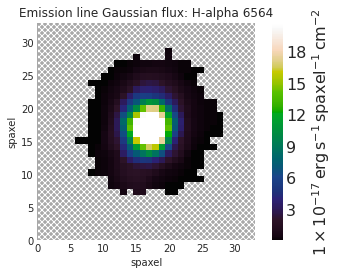

In [6]:
maps = Maps('8485-1901')

ha = maps.emline_gflux_ha_6564
ha.plot()

### Stellar Velocity Map

Plot stellar velocity map

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Stellar velocity'}, xlabel='spaxel', ylabel='spaxel'>)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


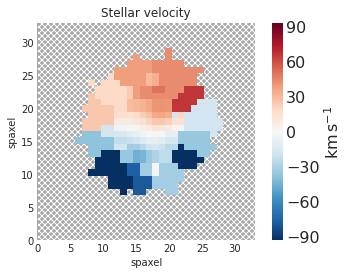

In [7]:
maps = Maps('8485-1901')

# Select and plot stellar velocity
sv = maps.stellar_vel
sv.plot()

Explore finding maximum and minimum values of stellar velocity

In [8]:
# Find average positive value TBC
avg_pos = np.where(sv.value > 0, sv.value)

# Find maximum and minimum value of stellar velocity
print("Max gas velocity: ", np.max(sv.value), " km/s")
print("Min gas velocity: ", np.min(sv.value), " km/s")

[ERROR]: Traceback (most recent call last):
  File "/Users/Jonah/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-6143fd0b2614>", line 2, in <module>
    avg_pos = np.where(sv.value > 0, sv.value)
  File "<__array_function__ internals>", line 5, in where
ValueError: either both or neither of x and y should be given



### Gas Velocity Map (H$\alpha$)

Plot gas velocity map

In [ ]:
maps = Maps('8485-1901')

# Select and plot gas velocity
gv = maps.emline_gvel_ha_6564  # Gas velocity of OII 3727
gv.plot()

Explore finding maximum and minimum values of stellar velocity

In [ ]:
# Find maximum and minimum value of gas velocity
print("Max gas velocity: ", np.max(gv.value), " km/s")
print("Min gas velocity: ", np.min(gv.value), " km/s")

# Application to Smethurst et al., 2018 Sample

### Stellar Velocity Maps

In [ ]:
# Plot initial figure and axes
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# MaNGA codes for each class of rotator
non_reg_ids = ['8600-12703', '8466-6103', '8726-1901']
slow_rot_ids = ['8721-12701', '8481-6101', '8725-1902']
fast_rot_ids = ['8078-12703', '8615-6104', '8597-1902']

# Non-regular rotators
for i in range(len(non_reg_ids)):
    # Access map of ith galaxy
    maps = Maps(non_reg_ids[i])

    # Acess stellar velocity data using datamodel code
    sv = maps.stellar_vel

    # Plot along top row
    sv.plot(fig=fig, ax=ax[0, i], title=''.join((non_reg_ids[i], ' stellar_vel')))

# Slow rotators
for i in range(len(slow_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(slow_rot_ids[i])

    # Acess stellar velocity data using datamodel code
    sv = maps.stellar_vel

    # Plot along top row
    sv.plot(fig=fig, ax=ax[1, i], title=''.join((slow_rot_ids[i], ' stellar_vel')))

# Fast rotators
for i in range(len(fast_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(fast_rot_ids[i])

    # Acess stellar velocity data using datamodel code
    sv = maps.stellar_vel

    # Plot along top row
    sv.plot(fig=fig, ax=ax[2, i], title=''.join((fast_rot_ids[i], ' stellar_vel')))
    
plt.savefig("Smethurst_2018_Stellar_Velocities.jpg")
plt.subplots_adjust(wspace=0.4, hspace=0.4)

### Gas Velocity Maps (H$\alpha$)

In [ ]:
# Plot initial figure and axes
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# MaNGA codes for each class of rotator
non_reg_ids = ['8600-12703', '8466-6103', '8726-1901']
slow_rot_ids = ['8721-12701', '8481-6101', '8725-1902']
fast_rot_ids = ['8078-12703', '8615-6104', '8597-1902']

# Non-regular rotators
for i in range(len(non_reg_ids)):
    # Access map of ith galaxy
    maps = Maps(non_reg_ids[i])

    # Acess stellar velocity data using datamodel code
    gv = maps.emline_gvel_ha_6564

    # Plot along top row
    gv.plot(fig=fig, ax=ax[0, i], title=''.join((non_reg_ids[i], ' gvel_h_alpha')))

# Slow rotators
for i in range(len(slow_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(slow_rot_ids[i])

    # Acess stellar velocity data using datamodel code
    gv = maps.emline_gvel_ha_6564

    # Plot along top row
    gv.plot(fig=fig, ax=ax[1, i], title=''.join((slow_rot_ids[i], ' gvel_h_alpha')))

# Fast rotators
for i in range(len(fast_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(fast_rot_ids[i])

    # Acess stellar velocity data using datamodel code
    gv = maps.emline_gvel_ha_6564

    # Plot along top row
    gv.plot(fig=fig, ax=ax[2, i], title=''.join((fast_rot_ids[i], ' gvel_h_alpha')))
    
plt.savefig("Smethurst_2018_Gas_Velocities.jpg")
plt.subplots_adjust(wspace=0.4, hspace=0.4)